In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Configura o tema do seaborn primeiro
sns.set_theme(style="darkgrid")

# Em seguida, definir os parâmetros globais do matplotlib
plt.rcParams.update({
    'font.family': 'serif',         # Fonte geral
    'font.serif': 'Times New Roman',# Estilo da fonte
    'font.size': 12,                # Tamanho da fonte
    'axes.labelsize': 12,           # Tamanho da fonte dos rótulos dos eixos
    'axes.titlesize': 14,           # Tamanho da fonte dos títulos dos subplots
    'xtick.labelsize': 10,          # Tamanho da fonte dos rótulos do eixo x
    'ytick.labelsize': 10,          # Tamanho da fonte dos rótulos do eixo y
    'axes.labelweight': 'bold',     # Títulos dos eixos x e y em negrito
    'legend.fontsize': 12,          # Tamanho da fonte da legenda
    'figure.titlesize': 16,         # Tamanho da fonte do título da figura
    'axes.spines.right': False,     # Remover a espinha do lado direito
    'axes.spines.top': False,       # Remover a espinha do topo
})

# Função para configurar rótulos do eixo x e y em negrito
def set_bold_labels(ax):
    ax.set_xlabel('Sex', weight='bold')
    ax.set_ylabel('Count', weight='bold')


In [13]:
#Neste caso:

# `..` : significa "um nível acima do diretório atual".
# `/data/raw/train.csv`: indica que o arquivo train.csv está dentro da pasta raw, 
# que por sua vez está dentro da pasta data.

df_train = pd.read_csv('../../data/raw/train.csv', sep=',')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df_train['Target'] = df_train['Survived'].map({1: 'Sobreviveu', 0: 'Não Sobreviveu'})
df_train['Pclass'] = pd.Categorical(df_train['Pclass'], categories=[1, 2, 3], ordered=True)

## Categóricas

Tipos Categóricas:
- Sex
- Pclass

In [16]:
# Contagem dos valores na coluna 'Sex'
sex_counts = df_train['Sex'].value_counts(dropna=False).reset_index()
sex_counts

,Sex,count
0,male,577
1,female,314


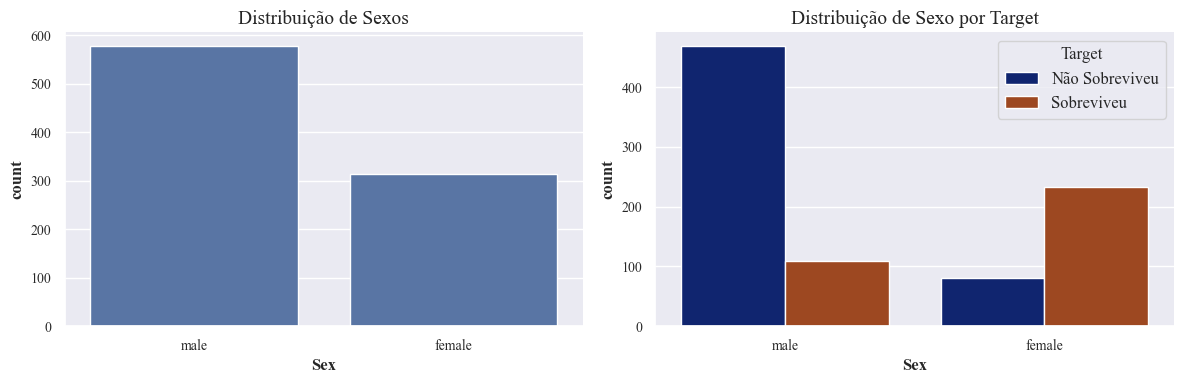

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
sns.countplot(ax=ax[0], data=df_train, x='Sex')
sns.countplot(ax=ax[1], data=df_train, x='Sex', hue = 'Target', palette='dark', edgecolor = 'white')

ax[0].set_title('Distribuição de Sexos')
ax[1].set_title('Distribuição de Sexo por Target')

# Ajustando o layout da figura
plt.tight_layout()
plt.show()

# Outra opção
# sns.histplot(ax=ax[0], data=df_train, x='Sex')
# sns.histplot(ax=ax[1], data=df_train, x='Sex', hue = 'Target', multiple="dodge", palette='dark', edgecolor = 'white', shrink=.8)
# shrink=.8: Controla a largura das barras no gráfico. 
# multiple="dodge": Especifica o método de posicionamento dos histogramas. 
# O valor "dodge" faz com que os histogramas dos diferentes níveis de Target sejam colocados lado a lado.

In [18]:
# df_train['Pclass'] = df_train['Pclass'].map({1: 'Primeira_Classe', 2: 'Segunda_Classe', 3:'Terceira_Classe'})

df_train['Pclass'].value_counts(dropna=False).reset_index()

,Pclass,count
0,3,491
1,1,216
2,2,184


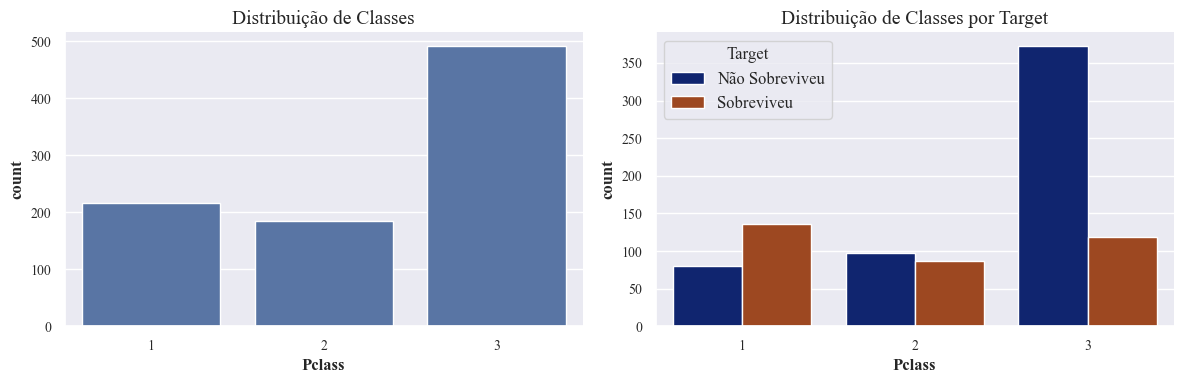

In [19]:
fig, ax = plt.subplots(1,2, figsize = (12, 4))
sns.countplot(ax = ax[0], data=df_train, x = 'Pclass', order = [1,2,3])
sns.countplot(ax = ax[1], data=df_train, x = 'Pclass', hue = 'Target', order = [1,2,3], palette='dark', edgecolor = 'white')

ax[0].set_title('Distribuição de Classes')
ax[1].set_title('Distribuição de Classes por Target')

# Ajustando o layout da figura
plt.tight_layout()
plt.show()


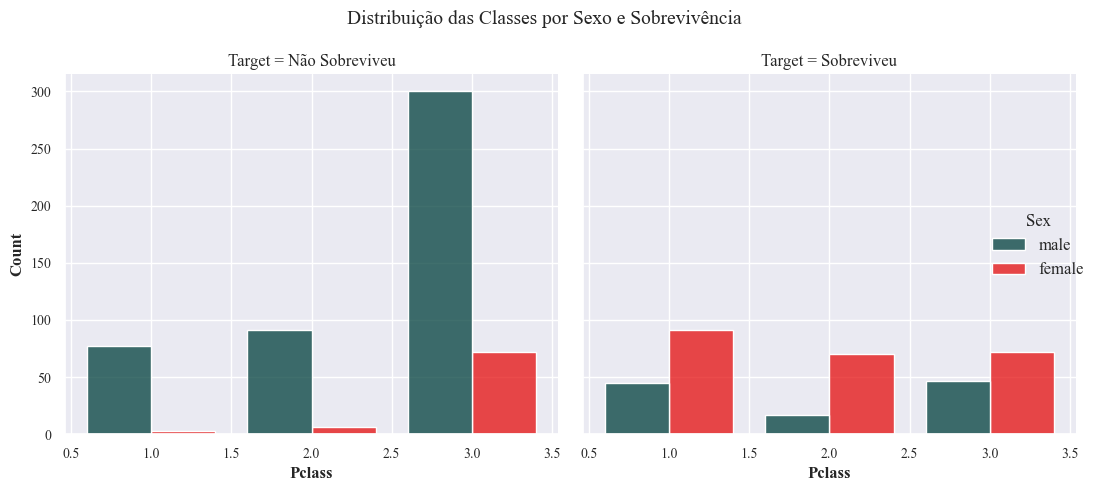

In [67]:
custom_palette = {'male': '#003f3c', 'female': '#e50e0e'}
# Criando o gráfico
grafico = sns.displot(
    data=df_train, x='Pclass', hue='Sex', multiple="dodge", shrink=.8, col='Target',
    palette=custom_palette, edgecolor = 'white')

grafico.fig.suptitle('Distribuição das Classes por Sexo e Sobrevivência', fontsize=14)

# Ajustando a posição do título para que não sobreponha os subplots
grafico.fig.subplots_adjust(top=0.88)
plt.tight_layout()
plt.show()


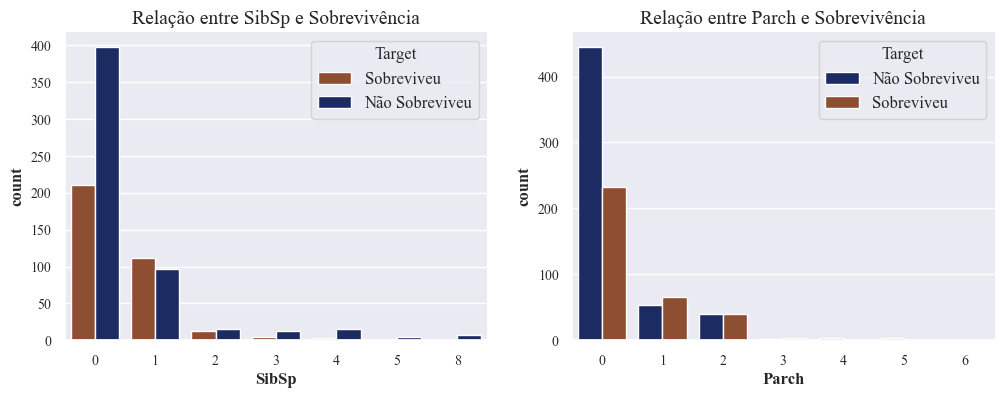

In [55]:
# sns.histplot(data=df_train, x = 'SibSp', hue = 'Target', palette='dark', edgecolor = 'white', multiple="dodge")

# Definir a paleta de cores para 'Sobreviveu' e 'Não Sobreviveu'
palette_dict = {'Sobreviveu': '#9D4821', 'Não Sobreviveu': '#10256F'}
fig, ax = plt.subplots(1, 2, figsize = (12,4))
sns.countplot(ax = ax[0],data=df_train, x = 'SibSp', hue = 'Target', palette=palette_dict, edgecolor = 'white')
sns.countplot(ax = ax[1],data=df_train, x = 'Parch', hue = 'Target', palette=palette_dict, edgecolor = 'white')

ax[0].set_title('Relação entre SibSp e Sobrevivência')
ax[1].set_title('Relação entre Parch e Sobrevivência')
plt.show()

In [46]:
df_train['Embarked'].value_counts(dropna=False).reset_index()

,Embarked,count
0,S,644
1,C,168
2,Q,77
3,NaN,2


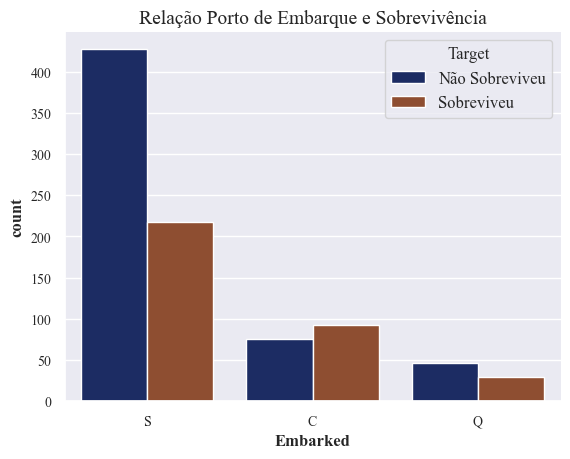

In [68]:
# Outras opções
# grafico = sns.displot(data = df_train, x = 'Embarked', hue='Target', multiple="dodge", palette=palette_dict)
# sns.countplot(data = df_train, x = 'Embarked', hue='Target', palette=palette_dict)
# plt.title('Relação Porto de Embarque e Sobrevivência')
# plt.show()

grafico = sns.countplot(data = df_train, x = 'Embarked', hue='Target', palette=palette_dict)
grafico.set_title('Relação Porto de Embarque e Sobrevivência')
plt.show()

In [93]:
# Tratando NaN na coluna 'Cabin' como "NULO"
df_train['Cabin'].fillna('NULO', inplace=True)

# Quebrando a coluna 'Cabin' em duas novas colunas: 'Cabin_Letter' e 'Cabin_Number'
df_train['Cabin_Letter'] = df_train['Cabin'].str.extract(r'([a-zA-Z]+)', expand=False)
df_train['Cabin_Number'] = df_train['Cabin'].str.extract(r'(\d+)', expand=False)

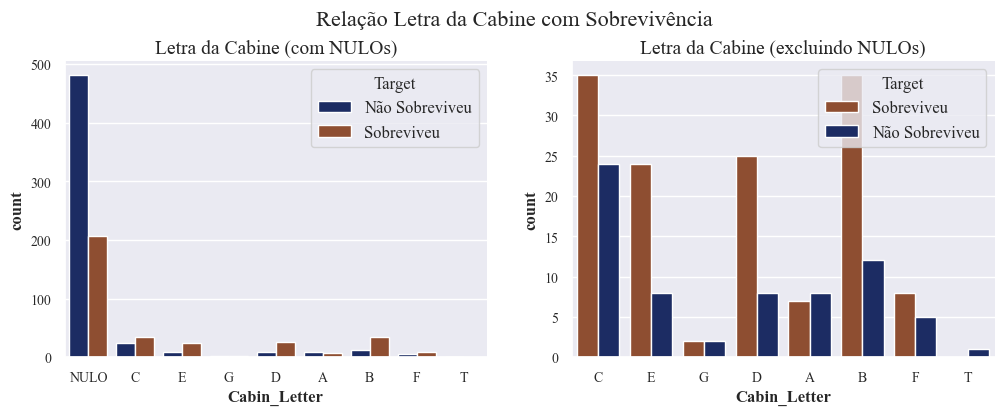

In [114]:
# sns.displot(data=df_train, x = 'Cabin_Letter', hue='Target', multiple="dodge", shrink=.8)

fig, ax = plt.subplots(1, 2, figsize = (12,4))
sns.countplot(ax = ax[0], data=df_train, x = 'Cabin_Letter', hue='Target', palette=palette_dict)
sns.countplot(ax = ax[1], data=df_train.query('Cabin_Letter != "NULO"'), x = 'Cabin_Letter', hue='Target', palette=palette_dict)

# Título da figura
fig.suptitle('Relação Letra da Cabine com Sobrevivência')
ax[0].set_title('Letra da Cabine (com NULOs)')
ax[1].set_title('Letra da Cabine (excluindo NULOs)')
fig.subplots_adjust(top=0.85)
plt.show()